# Data Exploration
Catergorize store based on its characteristics

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 2. Load Cleaned Dataset

In [5]:
df = pd.read_csv("/stores_cleaned.csv")
df.head()

,store_nbr,city,state,type,cluster,type_encoded
0,1,Quito,Pichincha,D,13,3
1,2,Quito,Pichincha,D,13,3
2,3,Quito,Pichincha,D,8,3
3,4,Quito,Pichincha,D,9,3
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3


## 3. Stores Analysis

### 3.1. Number of stores by city

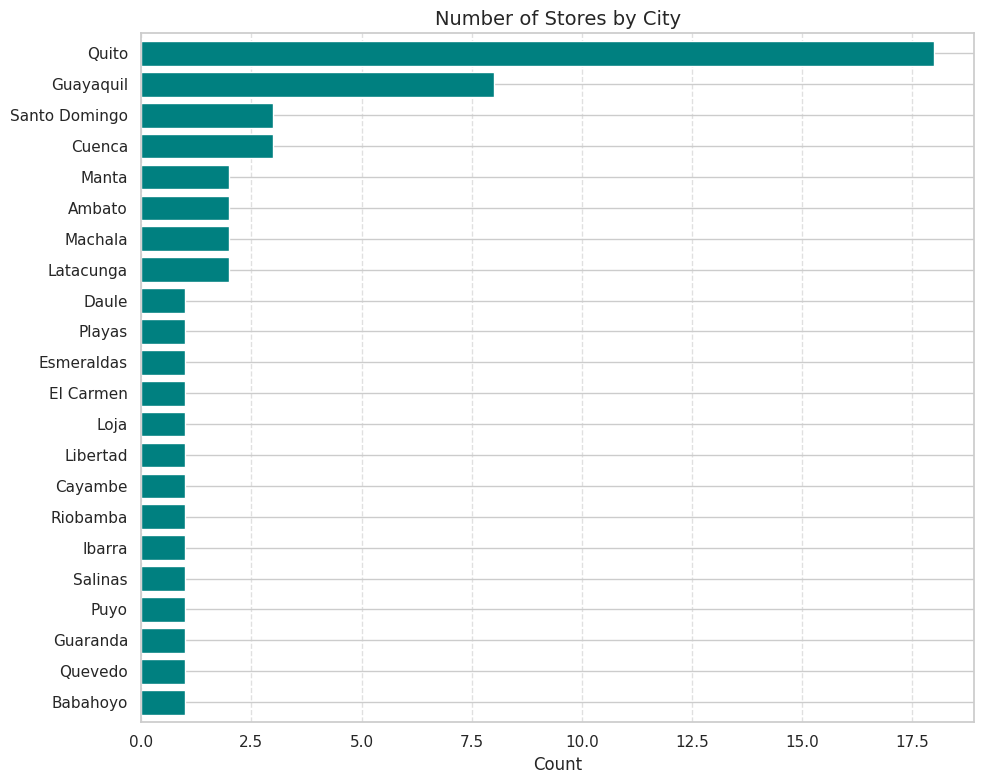

In [27]:
city_counts = df['city'].value_counts().sort_values()

plt.figure(figsize=(10, 8))
city_counts.plot(kind='barh', color='teal', width=0.8)

plt.title('Number of Stores by City', fontsize=14)
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

#### Statistical Summary: Geographic Distribution

In [ ]:
# Geographic Concentration Statistics
total_cities = df['city'].nunique()
total_states = df['state'].nunique()
total_stores = len(df)

city_counts = df['city'].value_counts()
top_city = city_counts.index[0]
top_city_count = city_counts.iloc[0]
top_city_pct = (top_city_count / total_stores) * 100

# Cities with only 1 store
single_store_cities = (city_counts == 1).sum()
single_store_cities_pct = (single_store_cities / total_cities) * 100

# Top 5 cities concentration
top_5_cities_count = city_counts.head(5).sum()
top_5_cities_pct = (top_5_cities_count / total_stores) * 100

print("Geographic Distribution Statistics:")
print("=" * 50)
print(f"Total Cities: {total_cities}")
print(f"Total States: {total_states}")
print(f"Total Stores: {total_stores}")
print(f"\nTop City: {top_city}")
print(f"  - Stores: {top_city_count} ({top_city_pct:.1f}% of network)")
print(f"\nCities with 1 store: {single_store_cities} ({single_store_cities_pct:.1f}% of cities)")
print(f"Top 5 cities: {top_5_cities_count} stores ({top_5_cities_pct:.1f}% of network)")
print(f"\n📍 Key Insight: {top_city} DOMINATES with {top_city_pct:.1f}% of all stores")

### 3.2. Correlation between cluster and types

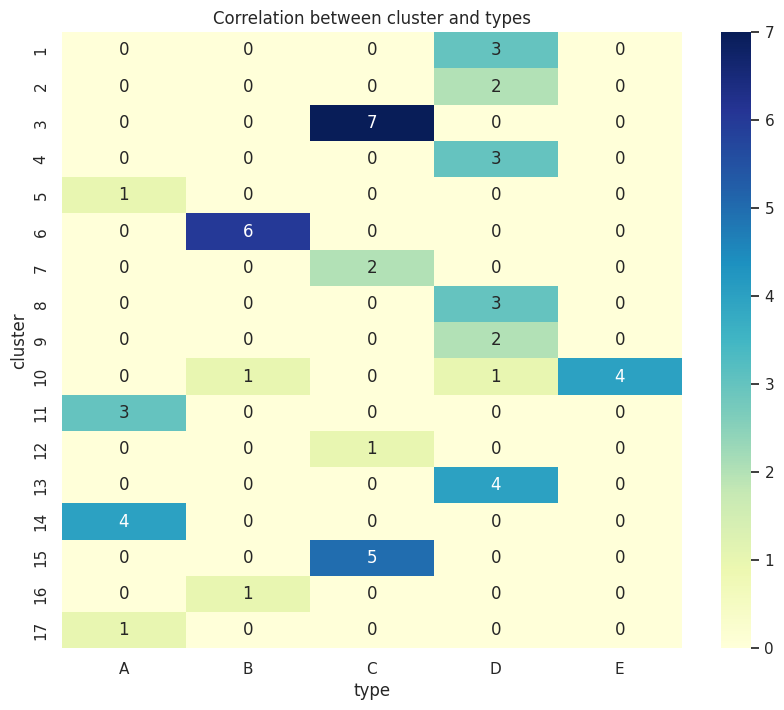

In [10]:
pivot_df = df.groupby(['cluster', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Correlation between cluster and types')
plt.show()

#### Statistical Summary: Store Type & Cluster Distribution

In [ ]:
# Store Type Distribution Statistics
type_counts = df['type'].value_counts().sort_index()
type_percentages = (type_counts / total_stores) * 100

print("Store Type Distribution:")
print("=" * 50)
for store_type, count in type_counts.items():
    pct = (count / total_stores) * 100
    print(f"Type {store_type}: {count} stores ({pct:.1f}%)")

# Cluster Statistics
cluster_stats = df['cluster'].describe()
unique_clusters = df['cluster'].nunique()
stores_per_cluster = total_stores / unique_clusters

print(f"\nCluster Distribution Statistics:")
print("=" * 50)
print(f"Total Clusters: {unique_clusters}")
print(f"Average stores per cluster: {stores_per_cluster:.1f}")
print(f"Cluster range: {int(df['cluster'].min())} to {int(df['cluster'].max())}")
print(f"Median cluster: {df['cluster'].median()}")
print(f"Std deviation: {df['cluster'].std():.2f}")

# Most common type
most_common_type = type_counts.idxmax()
most_common_type_pct = type_percentages.max()

print(f"\n🏪 Key Insights:")
print(f"- Most common store type: Type {most_common_type} ({most_common_type_pct:.1f}%)")
print(f"- Store types are RELATIVELY BALANCED (no dominance >35%)")
print(f"- {unique_clusters} clusters for {total_stores} stores = fine-grained segmentation")

### 3.3. Store distribution by City

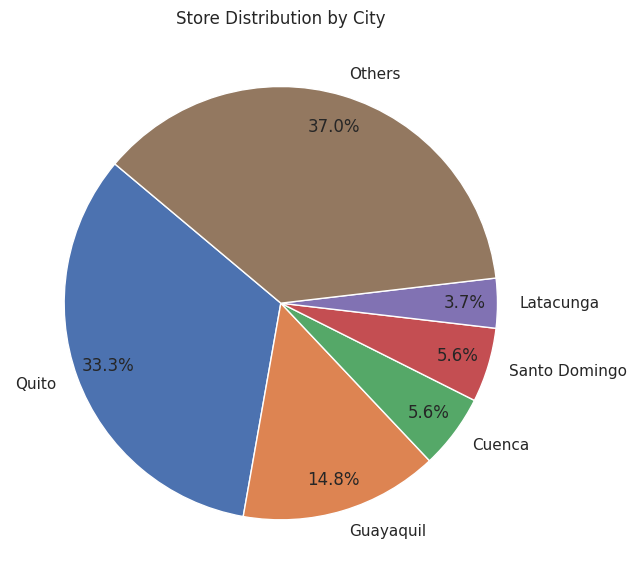

In [29]:
counts_city = df['city'].value_counts()
city_plot = pd.concat([counts_city.head(5), pd.Series({'Others': counts_city.iloc[5:].sum()})])

plt.figure(figsize=(8, 6))
city_plot.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Store Distribution by City')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 3.4. Store distribution by State

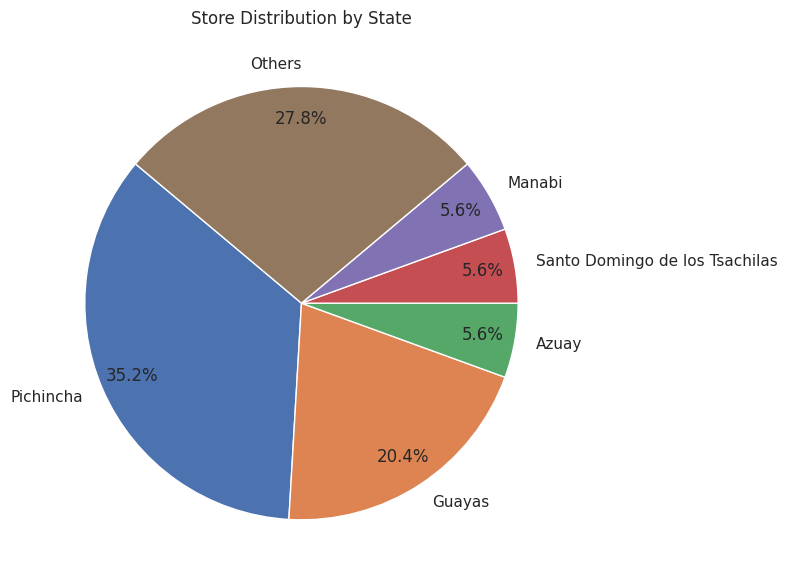

In [30]:
counts_state = df['state'].value_counts()
state_plot = pd.concat([counts_state.head(5), pd.Series({'Others': counts_state.iloc[5:].sum()})])

plt.figure(figsize=(8, 6))
state_plot.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Store Distribution by State')
plt.ylabel('')
plt.tight_layout()
plt.show()